**I asked chat gpt to improve my code this is what it gave me.**
**This data analysis pipeline is used to calculate and plot the average investiagtion time as a function of social agent ie short or long term familarity.**

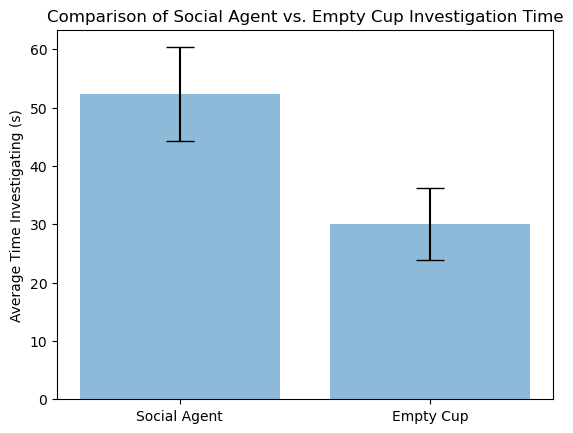

Cagemate vs. Empty:
t-statistic: 0.4833133544720802
p-value: 0.6363445456770658

Familiar vs. Empty:
t-statistic: 2.75991569824763
p-value: 0.015343254212607405


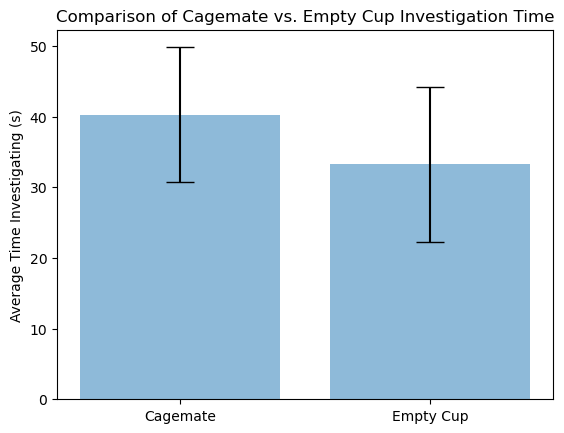

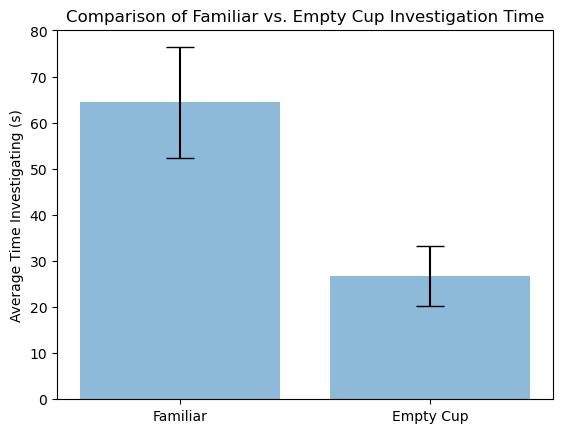

,Test,Animal,Animal notes,Segment of test,social_agent,empty_cup,Whole-Chamber : time (s),Whole Chamber Social Agent : time (s),Whole Chamber Empty Cup : time (s),Social Agent Chamber : time (s),Empty Cup Chamber : time (s)
0,1,1.1.1,Familiar,0 - 300 secs.,68.2,35.9,256.5,107.4,97.8,NaN,NaN
1,2,1.2.1,Familiar,0 - 300 secs.,79.4,18.0,240.7,136.5,60.0,NaN,NaN
2,3,1.3.1,Cagemate,0 - 300 secs.,23.4,11.5,277.5,115.0,49.5,NaN,NaN
3,4,1.1.3,Cagemate,0 - 300 secs.,49.4,50.8,218.3,70.1,111.1,NaN,NaN
4,5,1.2.3,Cagemate,0 - 300 secs.,20.3,90.9,166.0,48.0,141.0,NaN,NaN
5,6,1.4.3,Familiar,0 - 300 secs.,56.1,48.7,195.2,78.2,106.9,NaN,NaN
6,7,1.4.1,Cagemate,0 - 300 secs.,30.7,54.1,237.6,61.9,158.2,NaN,NaN
7,8,1.3.3,Familiar,0 - 300 secs.,39.3,51.1,247.3,58.2,127.4,NaN,NaN
0,1,2.1.2,Cagemate,0 - 300 secs.,84.8,37.4,52.9,NaN,NaN,210.7,88.5
1,2,2.3.2,Familiar,0 - 300 secs.,129.4,0.0,31.1,NaN,NaN,254.5,14.3


In [46]:
import pandas as pd
from scipy.stats import ttest_ind
from pathlib import Path
import glob
import os
import matplotlib.pyplot as plt
import numpy as np

# Set the path to the folder containing your CSV files
folder_path = glob.glob(r"D:\Sequioa\anymaze_data\cage*.csv")

# Read all CSV files and rename columns
def read_and_rename_columns(folder_path):
    data_frames = []
    for file in folder_path:
        df = pd.read_csv(file)
        for column in df.columns:
            if 'time investigating' in column:
                df = df.rename(
                    columns={column: "_".join(column.split(" ")[0:2]).lower()})
        data_frames.append(df)
    return pd.concat(data_frames)

soc = read_and_rename_columns(folder_path)

# Plot average time investigating for social agent vs. empty cup
def plot_bar_with_sem(labels, means, sems, title):
    x = np.arange(len(labels))
    plt.bar(x, means, yerr=sems, align='center', alpha=0.5, ecolor='black', capsize=10)
    plt.xticks(x, labels)
    plt.ylabel('Average Time Investigating (s)')
    plt.title(title)
    plt.show()

# Calculate mean and SEM for social agent and empty cup
avg_social_agent = soc['social_agent'].mean()
avg_empty_cup = soc['empty_cup'].mean()
sem_social_agent = soc['social_agent'].sem()
sem_empty_cup = soc['empty_cup'].sem()

plot_bar_with_sem(['Social Agent', 'Empty Cup'], [avg_social_agent, avg_empty_cup], [sem_social_agent, sem_empty_cup], 'Comparison of Social Agent vs. Empty Cup Investigation Time')

# Filter data based on Animal notes column
cagemates = soc[soc['Animal notes'] == 'Cagemate']
familiar = soc[soc['Animal notes'] == 'Familiar']

# Perform t-tests comparing cagemate vs. empty and familiar vs. empty
t_stat_cagemate, p_value_cagemate = ttest_ind(cagemates['social_agent'], cagemates['empty_cup'])
t_stat_familiar, p_value_familiar = ttest_ind(familiar['social_agent'], familiar['empty_cup'])

# Print the results
print("Cagemate vs. Empty:")
print("t-statistic:", t_stat_cagemate)
print("p-value:", p_value_cagemate)

print("\nFamiliar vs. Empty:")
print("t-statistic:", t_stat_familiar)
print("p-value:", p_value_familiar)

# Calculate mean and SEM for cagemates and familiar
cagemate_mean = cagemates['social_agent'].mean()
familiar_mean = familiar['social_agent'].mean()
cagemate_sem = cagemates['social_agent'].sem()
familiar_sem = familiar['social_agent'].sem()

plot_bar_with_sem(['Cagemate', 'Empty Cup'], [cagemate_mean, cagemates['empty_cup'].mean()], [cagemate_sem, cagemates['empty_cup'].sem()], 'Comparison of Cagemate vs. Empty Cup Investigation Time')
plot_bar_with_sem(['Familiar', 'Empty Cup'], [familiar_mean, familiar['empty_cup'].mean()], [familiar_sem, familiar['empty_cup'].sem()], 'Comparison of Familiar vs. Empty Cup Investigation Time')

soc


**NEW CODE**
*import library*

In [3]:
import pandas as pd
from scipy.stats import ttest_ind
from pathlib import Path
import glob
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [45]:
# Read the first CSV file
df1 = pd.read_csv(r"D:\Sequioa\anymaze_data\cage_1_soc_day_1_3.csv")

# Read the second CSV file
df2 = pd.read_csv(r"D:\Sequioa\anymaze_data\cage_2_soc_day_2_4.csv")

# Rename columns in the first DataFrame
df1.rename(columns={
    'Social Agent Left : time investigating (s)': 'Social Agent',
    'Empty Cup Right : time investigating (s)': 'Empty Cup'
}, inplace=True)

# Rename columns in the second DataFrame
df2.rename(columns={
    'Social Agent on the Right : time investigating (s)': 'Social Agent',
    'Empty Cup Left : time investigating (s)': 'Empty Cup'
}, inplace=True)

# Concatenate the DataFrames along the rows
combined_df = pd.concat([df1, df2], ignore_index=True)
combined_df['Animal notes'] = combined_df['Animal notes']
combined_df

,Test,Animal,Animal notes,Segment of test,Social Agent,Empty Cup,Whole-Chamber : time (s),Whole Chamber Social Agent : time (s),Whole Chamber Empty Cup : time (s),Social Agent Chamber : time (s),Empty Cup Chamber : time (s)
0,1,1.1.1,Familiar,0 - 300 secs.,68.2,35.9,256.5,107.4,97.8,NaN,NaN
1,2,1.2.1,Familiar,0 - 300 secs.,79.4,18.0,240.7,136.5,60.0,NaN,NaN
2,3,1.3.1,Cagemate,0 - 300 secs.,23.4,11.5,277.5,115.0,49.5,NaN,NaN
3,4,1.1.3,Cagemate,0 - 300 secs.,49.4,50.8,218.3,70.1,111.1,NaN,NaN
4,5,1.2.3,Cagemate,0 - 300 secs.,20.3,90.9,166.0,48.0,141.0,NaN,NaN
5,6,1.4.3,Familiar,0 - 300 secs.,56.1,48.7,195.2,78.2,106.9,NaN,NaN
6,7,1.4.1,Cagemate,0 - 300 secs.,30.7,54.1,237.6,61.9,158.2,NaN,NaN
7,8,1.3.3,Familiar,0 - 300 secs.,39.3,51.1,247.3,58.2,127.4,NaN,NaN
8,1,2.1.2,Cagemate,0 - 300 secs.,84.8,37.4,52.9,NaN,NaN,210.7,88.5
9,2,2.3.2,Familiar,0 - 300 secs.,129.4,0.0,31.1,NaN,NaN,254.5,14.3


**Splitting my df based on Animal notes column**

In [5]:
combined_df = pd.DataFrame(combined_df)

# Splitting DataFrame based on 'Animal notes' column
familiar_df = combined_df[combined_df['Animal notes'] == 'Familiar']
cagemate_df = combined_df[combined_df['Animal notes'] == 'Cagemate']

# Printing the resulting DataFrames
print("Familiar Animals DataFrame:")
print(familiar_df)

print("Cagemate Animals DataFrame:")
print(cagemate_df)
print(combined_df.columns)
cagemate_df

Familiar Animals DataFrame:
    Test Animal Animal notes Segment of test  Social Agent  Empty Cup  \
0      1  1.1.1     Familiar   0 - 300 secs.          68.2       35.9   
1      2  1.2.1     Familiar   0 - 300 secs.          79.4       18.0   
5      6  1.4.3     Familiar   0 - 300 secs.          56.1       48.7   
7      8  1.3.3     Familiar   0 - 300 secs.          39.3       51.1   
9      2  2.3.2     Familiar   0 - 300 secs.         129.4        0.0   
10     3  2.4.2     Familiar   0 - 300 secs.          47.4       12.1   
11     4  2.1.4     Familiar   0 - 300 secs.          79.2       14.8   
12     5  2.2.4     Familiar   0 - 300 secs.          16.0       33.9   

    Whole-Chamber : time (s)  Whole Chamber Social Agent : time (s)  \
0                      256.5                                  107.4   
1                      240.7                                  136.5   
5                      195.2                                   78.2   
7                      247.3  

,Test,Animal,Animal notes,Segment of test,Social Agent,Empty Cup,Whole-Chamber : time (s),Whole Chamber Social Agent : time (s),Whole Chamber Empty Cup : time (s),Social Agent Chamber : time (s),Empty Cup Chamber : time (s)
2,3,1.3.1,Cagemate,0 - 300 secs.,23.4,11.5,277.5,115.0,49.5,NaN,NaN
3,4,1.1.3,Cagemate,0 - 300 secs.,49.4,50.8,218.3,70.1,111.1,NaN,NaN
4,5,1.2.3,Cagemate,0 - 300 secs.,20.3,90.9,166.0,48.0,141.0,NaN,NaN
6,7,1.4.1,Cagemate,0 - 300 secs.,30.7,54.1,237.6,61.9,158.2,NaN,NaN
8,1,2.1.2,Cagemate,0 - 300 secs.,84.8,37.4,52.9,NaN,NaN,210.7,88.5
13,6,2.3.4,Cagemate,0 - 300 secs.,49.7,10.7,98.2,NaN,NaN,168.3,32.9
14,7,2.4.4,Cagemate,0 - 300 secs.,63.7,0.0,78.5,NaN,NaN,184.4,37.1
15,8,2.2.2,Cagemate,0 - 300 secs.,0.0,10.5,0.0,NaN,NaN,288.0,12.0


**Summary Stats**

*The provided code calculates summary statistics for investigation time data. This analysis aims to provide key insights into the central tendency and dispersion of the investigation time measurements, allowing for a better understanding of the distribution of the data.*

In [6]:
# Calculate summary statistics
summary_stats = combined_df[['Empty Cup', 'Social Agent']].describe()

# Calculate summary statistics for cagemates
cagemate_summary_stats = cagemate_df[cagemate_df['Animal notes'] == 'Cagemate'][['Empty Cup', 'Social Agent']].describe()

# Calculate summary statistics for familiar
familiar_summary_stats = familiar_df[familiar_df['Animal notes'] == 'Familiar'][['Empty Cup', 'Social Agent']].describe()

# Print summary statistics
print("Summary Statistics for Investigation Time:")
print(summary_stats)

print("Summary Statistics for Cagemate Social Agents:")
print(cagemate_summary_stats)

print("Summary Statistics for Familiar Social Agents:")
print(familiar_summary_stats)


Summary Statistics for Investigation Time:
       Empty Cup  Social Agent
count  16.000000     16.000000
mean   30.025000     52.312500
std    24.782211     32.086152
min     0.000000      0.000000
25%    11.300000     28.875000
50%    25.950000     49.550000
75%    49.225000     70.950000
max    90.900000    129.400000
Summary Statistics for Cagemate Social Agents:
       Empty Cup  Social Agent
count   8.000000      8.000000
mean   33.237500     40.250000
std    30.910374     26.994232
min     0.000000      0.000000
25%    10.650000     22.625000
50%    24.450000     40.050000
75%    51.625000     53.200000
max    90.900000     84.800000
Summary Statistics for Familiar Social Agents:
       Empty Cup  Social Agent
count   8.000000        8.0000
mean   26.812500       64.3750
std    18.357905       33.8356
min     0.000000       16.0000
25%    14.125000       45.3750
50%    25.950000       62.1500
75%    39.100000       79.2500
max    51.100000      129.4000


**Independent Samples t-test:**

*I have two groups (e.g., Empty Cup vs. Social Agents) and I want to compare the mean investigation time between them.*


In [7]:
# Extract the investigation time data for empty cup and social agent stimuli
empty_cup_investigation_time = combined_df['Empty Cup']
social_agent_investigation_time = combined_df['Social Agent']

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(empty_cup_investigation_time, social_agent_investigation_time)

# Print the results
print("Independent Samples T-test Results: empty cup vs. social agent")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

Independent Samples T-test Results: empty cup vs. social agent
T-statistic: -2.198937178763291
P-value: 0.03573131085057752


In [8]:
# Extract the investigation time data for empty cup and cagemate agent stimuli
cagemate_agent_investigation_time = cagemate_df['Social Agent']


# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(empty_cup_investigation_time, cagemate_agent_investigation_time)

# Print the results
print("Independent Samples T-test Results: empty cup vs. cagemate agent")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

Independent Samples T-test Results: empty cup vs. cagemate agent
T-statistic: -0.9257757549190533
P-value: 0.3646072748618343


In [9]:
# Extract the investigation time data for empty cup and cagemate agent stimuli
familiar_agent_investigation_time = familiar_df['Social Agent']

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(empty_cup_investigation_time, familiar_agent_investigation_time)

# Print the results
print("Independent Samples T-test Results: empty cup vs. familiar agent")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

Independent Samples T-test Results: empty cup vs. familiar agent
T-statistic: -2.834923732326889
P-value: 0.009638477286806656


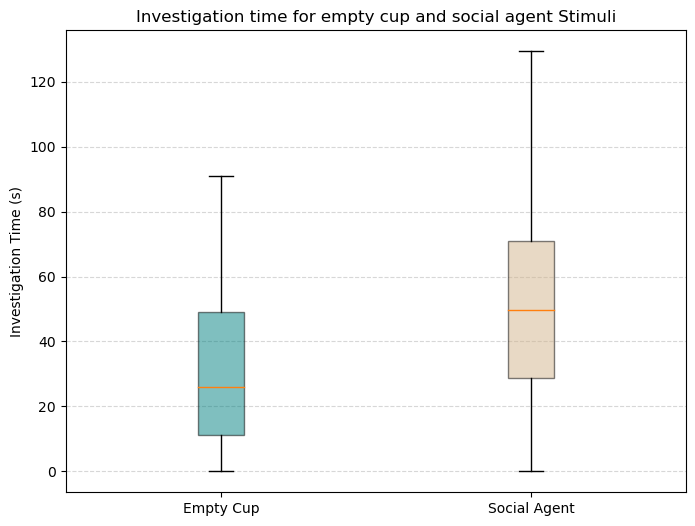

In [10]:
# Data for plotting
t_test = [empty_cup_investigation_time, social_agent_investigation_time]
labels = ['Empty Cup', 'Social Agent']
colors = ['teal', 'tan']  # Colors for Novel and Social Agent
alpha = 0.5  # Transparency value

# Create a box plot
plt.figure(figsize=(8, 6))
box = plt.boxplot(t_test, labels=labels, patch_artist=True)

# Customize boxplot colors
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(alpha)

# Add labels and title
plt.ylabel('Investigation Time (s)')
plt.title('Investigation time for empty cup and social agent Stimuli')

# Show plot
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()




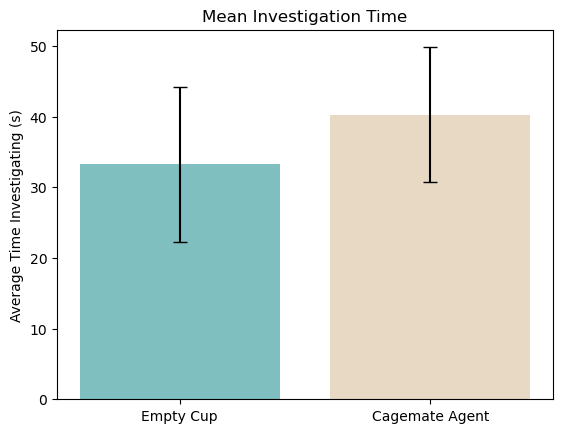

In [11]:
# Calculate summary statistics
summary_stats = cagemate_df[['Empty Cup', 'Social Agent']].describe()

# Extract mean values for each group
avg_empty_cup = summary_stats.loc['mean', 'Empty Cup']
avg_cagemate = summary_stats.loc['mean', 'Social Agent']
sem_empty_cup = summary_stats.loc['std', 'Empty Cup'] / np.sqrt(len(cagemate_df))
sem_cagemate = summary_stats.loc['std', 'Social Agent'] / np.sqrt(len(cagemate_df))

# Perform t-test
t_stat, p_value = stats.ttest_ind(cagemate_df['Empty Cup'], cagemate_df['Social Agent'])

# Create positions for the bars
x = ['Empty Cup', 'Cagemate Agent']

# Heights of the bars
heights = [avg_empty_cup, avg_cagemate]

# SEMs
sems = [sem_empty_cup, sem_cagemate]


# Plot the bar plot with error bars
plt.bar(x, heights, yerr=sems, capsize=5, color=['teal', 'tan'], alpha=0.5)

plt.ylabel('Average Time Investigating (s)')
plt.title('Mean Investigation Time')

plt.grid(False)  # Remove grid lines
plt.show()


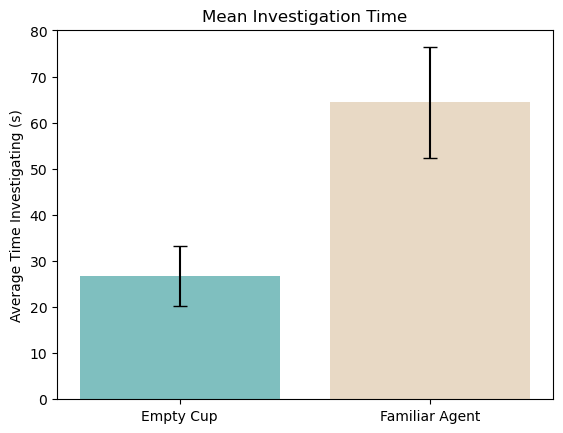

In [12]:
# Calculate summary statistics
summary_stats = familiar_df[['Empty Cup', 'Social Agent']].describe()

# Extract mean values for each group
avg_empty_cup = summary_stats.loc['mean', 'Empty Cup']
avg_familiar = summary_stats.loc['mean', 'Social Agent']
sem_empty_cup = summary_stats.loc['std', 'Empty Cup'] / np.sqrt(len(familiar_df))
sem_familiar = summary_stats.loc['std', 'Social Agent'] / np.sqrt(len(familiar_df))

# Perform t-test
t_stat, p_value = stats.ttest_ind(familiar_df['Empty Cup'], familiar_df['Social Agent'])

# Create positions for the bars
x = ['Empty Cup', 'Familiar Agent']

# Heights of the bars
heights = [avg_empty_cup, avg_familiar]

# SEMs
sems = [sem_empty_cup, sem_familiar]

# Plot the bar plot with error bars
plt.bar(x, heights, yerr=sems, capsize=5, color=['teal', 'tan'], alpha=0.5)

# Add labels and title
plt.ylabel('Average Time Investigating (s)')
plt.title('Mean Investigation Time')

plt.grid(False)  # Remove grid lines
plt.show()


Text(0.5, 1.0, 'Mean Investigation Time')

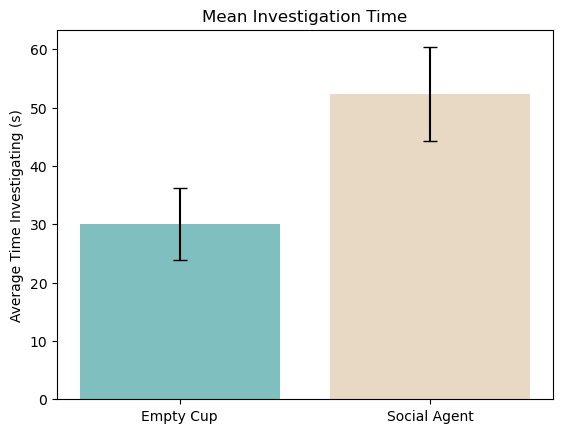

In [13]:
# Combine investigation times for both 'Cagemate' and 'Familiar' into one group
social_agent_times = pd.concat([familiar_df['Social Agent'], cagemate_df['Social Agent']])

# Calculate summary statistics for the combined group
summary_stats_social_agent = social_agent_times.describe()

# Extract mean values for the combined group
avg_empty_cup = combined_df['Empty Cup'].mean()
avg_social_agent = summary_stats_social_agent['mean']
sem_empty_cup = combined_df['Empty Cup'].std() / np.sqrt(len(combined_df))
sem_social_agent = summary_stats_social_agent['std'] / np.sqrt(len(social_agent_times))

# Perform t-test
t_stat, p_value = stats.ttest_ind(combined_df['Empty Cup'], social_agent_times)

# Create positions for the bars
x = ['Empty Cup', 'Social Agent']

# Heights of the bars
heights = [avg_empty_cup, avg_social_agent]

# SEMs
sems = [sem_empty_cup, sem_social_agent]

# Plot the bar plot with error bars
plt.bar(x, heights, yerr=sems, capsize=5, color=['teal', 'tan'], alpha=0.5)

# Add labels and title
plt.ylabel('Average Time Investigating (s)')
plt.title('Mean Investigation Time')


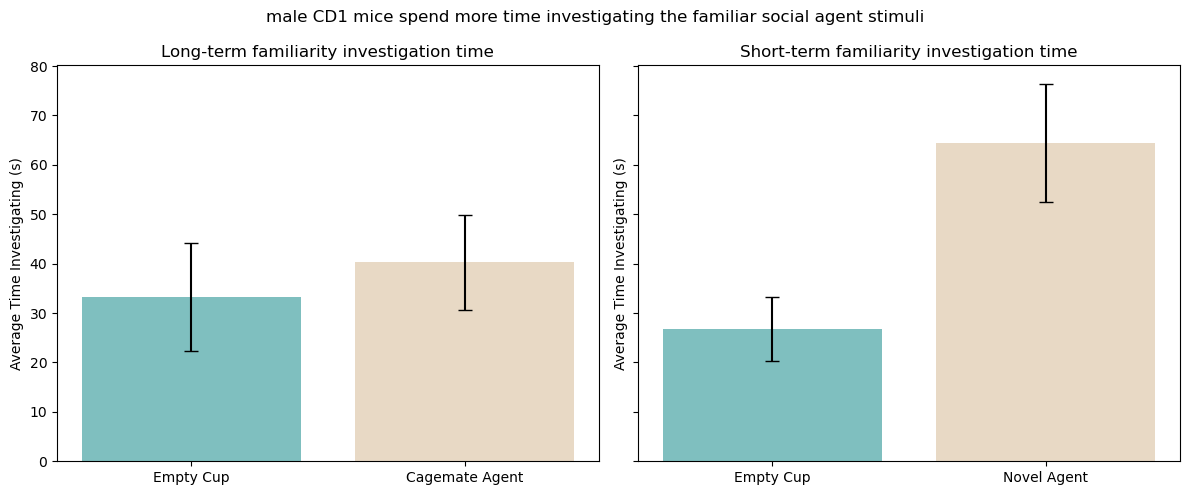

In [14]:
# Calculate summary statistics for cagemate
summary_stats_cagemate = cagemate_df[['Empty Cup', 'Social Agent']].describe()

# Extract mean values for cagemate group
avg_empty_cup_cagemate = summary_stats_cagemate.loc['mean', 'Empty Cup']
avg_cagemate = summary_stats_cagemate.loc['mean', 'Social Agent']
sem_empty_cup_cagemate = summary_stats_cagemate.loc['std', 'Empty Cup'] / np.sqrt(len(cagemate_df))
sem_cagemate = summary_stats_cagemate.loc['std', 'Social Agent'] / np.sqrt(len(cagemate_df))

# Perform t-test for cagemate
t_stat_cagemate, p_value_cagemate = stats.ttest_ind(cagemate_df['Empty Cup'], cagemate_df['Social Agent'])

# Calculate summary statistics for familiar
summary_stats_familiar = familiar_df[['Empty Cup', 'Social Agent']].describe()

# Extract mean values for familiar group
avg_empty_cup_familiar = summary_stats_familiar.loc['mean', 'Empty Cup']
avg_familiar = summary_stats_familiar.loc['mean', 'Social Agent']
sem_empty_cup_familiar = summary_stats_familiar.loc['std', 'Empty Cup'] / np.sqrt(len(familiar_df))
sem_familiar = summary_stats_familiar.loc['std', 'Social Agent'] / np.sqrt(len(familiar_df))

# Perform t-test for familiar
t_stat_familiar, p_value_familiar = stats.ttest_ind(familiar_df['Empty Cup'], familiar_df['Social Agent'])

# Set up the subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Plot for cagemate
axs[0].bar(['Empty Cup', 'Cagemate Agent'], [avg_empty_cup_cagemate, avg_cagemate],
            yerr=[sem_empty_cup_cagemate, sem_cagemate], capsize=5, color=['teal', 'tan'], alpha=0.5)
axs[0].set_ylabel('Average Time Investigating (s)')
axs[0].set_title('Long-term familiarity investigation time')

# Plot for familiar
axs[1].bar(['Empty Cup', 'Novel Agent'], [avg_empty_cup_familiar, avg_familiar],
            yerr=[sem_empty_cup_familiar, sem_familiar], capsize=5, color=['teal', 'tan'], alpha=0.5)
axs[1].set_ylabel('Average Time Investigating (s)')
axs[1].set_title('Short-term familiarity investigation time')

# Set titles
plt.suptitle('male CD1 mice spend more time investigating the familiar social agent stimuli')

# Show plot
plt.grid(False)  # Remove grid lines
plt.tight_layout()
plt.show()


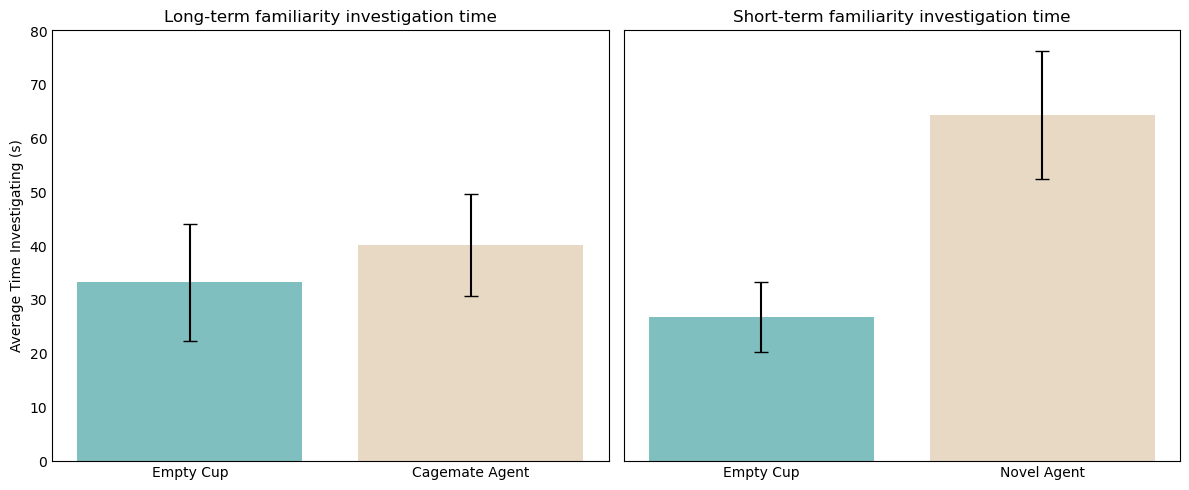

In [15]:
# Calculate summary statistics for cagemate
summary_stats_cagemate = cagemate_df[['Empty Cup', 'Social Agent']].describe()

# Extract mean values for cagemate group
avg_empty_cup_cagemate = summary_stats_cagemate.loc['mean', 'Empty Cup']
avg_cagemate = summary_stats_cagemate.loc['mean', 'Social Agent']
sem_empty_cup_cagemate = summary_stats_cagemate.loc['std', 'Empty Cup'] / np.sqrt(len(cagemate_df))
sem_cagemate = summary_stats_cagemate.loc['std', 'Social Agent'] / np.sqrt(len(cagemate_df))

# Perform t-test for cagemate
t_stat_cagemate, p_value_cagemate = stats.ttest_ind(cagemate_df['Empty Cup'], cagemate_df['Social Agent'])

# Calculate summary statistics for familiar
summary_stats_familiar = familiar_df[['Empty Cup', 'Social Agent']].describe()

# Extract mean values for familiar group
avg_empty_cup_familiar = summary_stats_familiar.loc['mean', 'Empty Cup']
avg_familiar = summary_stats_familiar.loc['mean', 'Social Agent']
sem_empty_cup_familiar = summary_stats_familiar.loc['std', 'Empty Cup'] / np.sqrt(len(familiar_df))
sem_familiar = summary_stats_familiar.loc['std', 'Social Agent'] / np.sqrt(len(familiar_df))

# Perform t-test for familiar
t_stat_familiar, p_value_familiar = stats.ttest_ind(familiar_df['Empty Cup'], familiar_df['Social Agent'])

# Set up the subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Plot for cagemate
axs[0].bar(['Empty Cup', 'Cagemate Agent'], [avg_empty_cup_cagemate, avg_cagemate],
            yerr=[sem_empty_cup_cagemate, sem_cagemate], capsize=5, color=['teal', 'tan'], alpha=0.5)
axs[0].set_ylabel('Average Time Investigating (s)')
axs[0].set_title('Long-term familiarity investigation time')
axs[0].tick_params(axis='both', which='both', length=0)  # Remove ticks on both axes

# Plot for familiar
axs[1].bar(['Empty Cup', 'Novel Agent'], [avg_empty_cup_familiar, avg_familiar],
            yerr=[sem_empty_cup_familiar, sem_familiar], capsize=5, color=['teal', 'tan'], alpha=0.5)
axs[1].set_title('Short-term familiarity investigation time')
axs[1].tick_params(axis='both', which='both', length=0)  # Remove ticks on both axes


# Show plot
plt.grid(False)  # Remove grid lines
plt.tight_layout()
plt.show()


In [16]:
# Replace 'file_path.xlsx' with the path to your Excel file
subject_rank = r'D:\Sequioa\CD1_pilot1_subject_ranks.xlsx'

# Read the Excel file into a pandas DataFrame
rank_df = pd.read_excel(subject_rank)

subject_rank
rank_df

,Subjects,rank1,cagemates,rank2,investigation time
0,1.3,4,1.1,1,24.4
1,1.4,2,1.2,3,49.4
2,1.1,1,1.3,4,20.3
3,1.2,3,1.4,2,30.7
4,2.1,3,2.3,3,84.8
5,2.2,1,2.4,2,49.7
6,2.3,3,2.1,3,63.7
7,2.4,2,2.2,1,0.0


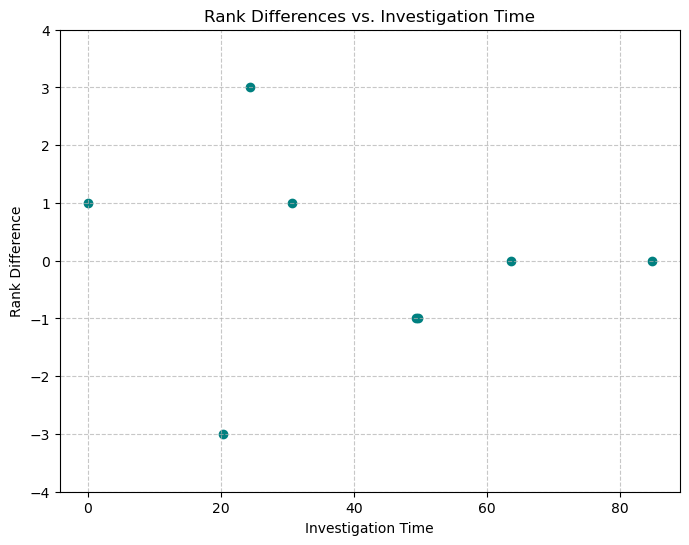

In [17]:
# Assuming rank_df contains columns 'Subjects', 'rank1', 'cagemates', 'rank2', and 'investigation time'


# Calculate the differences in rankings
rank_df['Rank_Difference'] = (rank_df['rank1'] - rank_df['rank2'])

# Plot the differences
plt.figure(figsize=(8, 6))
plt.scatter(rank_df['investigation time '], rank_df['Rank_Difference'], color='teal')
plt.xlabel("Investigation Time")
plt.ylabel("Rank Difference")
plt.title("Rank Differences vs. Investigation Time")
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Set y-axis limits
plt.ylim(-4, 4)

plt.show()


In [18]:
print(rank_df.columns)


Index(['Subjects ', 'rank1', 'cagemates', 'rank2', 'investigation time ',
       'Rank_Difference'],
      dtype='object')
